In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#!pip install pyyaml==5.4.1

# Dataset

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport 


In [ ]:
data=pd.read_csv('insurance.csv',sep=',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data information

In [ ]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Rapport


# Age Analysis

In [ ]:
fig = px.box(data, y="age",points="all")
fig.show()

Young Adult: from 18 - 35


Senior Adult: from 36 - 55

Elder: 56 or olde

In [ ]:
df1=data.age.loc[(18<=data.age) & (data.age<=35)]
df2=data.age.loc[(36<=data.age) & (data.age<=55)]
df3=data.age.loc[(56<=data.age) & (data.age<=64)]


In [ ]:
data['age'] = data['age'].replace([df1,df2,df3],['Young Adult','Senior Adult','Elder'])

In [ ]:
agecount=pd.DataFrame(data['age'].value_counts()).reset_index()
agecount=agecount.rename(columns={"index": "age", "age": "count"})
agecount

,age,count
0,Young Adult,574
1,Senior Adult,548
2,Elder,216


In [ ]:
import plotly.express as px
fig = px.pie(agecount, values='count',names='age',title='Age distribution ')
fig.show()


**Correlation between Age and Bmi**




In [ ]:
df1=data[['age','bmi']].groupby('age').sum().reset_index()
df1

,age,bmi
0,Elder,6855.695
1,Senior Adult,16888.860
2,Young Adult,17283.070


In [ ]:
fig = px.bar(df1, x="age", y="bmi", title='age vs total Body mass index')
fig.show()

**Correlation between Age and charge**




In [ ]:
data[['age','charges']]
charge_age=data[['age','charges']].groupby('age').sum().reset_index()
charge_age

,age,charges
0,Elder,4.059935e+06
1,Senior Adult,8.102560e+06
2,Young Adult,5.593331e+06


In [ ]:
fig = px.bar(charge_age, x="age", y="charges", title='age vs total charges')
fig.show()

# Smoke Analysis

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
smokercount=pd.DataFrame(data['smoker'].value_counts()).reset_index()
smokercount=smokercount.rename(columns={"index": "smoker", "smoker": "count"})
smokercount

,smoker,count
0,no,1064
1,yes,274


In [ ]:
fig = px.pie(smokercount, values='count',names='smoker',title='smoker data distribution ')
fig.show()

In [ ]:
#########OUSSSSSSAMMA
table = pd.crosstab(data["smoker"],data["age"])
table=pd.DataFrame(table)
print(table)


age     Elder  Senior Adult  Young Adult
smoker                                  
no        176           435          453
yes        40           113          121


In [ ]:
fig = px.bar(table,title='smoke distribution par rapport a la categorie dage')
fig.show()

# Bmi Analysis

In [ ]:
fig = px.histogram(data['bmi'],title="Body Mass Index distribution")
fig.show()

**Body Mass Index with gendre**

In [ ]:
fig = px.histogram(data,x='bmi',color='age',title="Body Mass Index distribution")
fig.show()

# Target Analysis


In [ ]:
fig = px.histogram(data['charges'])
fig.show()

In [ ]:
fig = px.box(data, y="charges", points="all")
fig.show()

# Correlation matrix

In [ ]:
plt.subplots(figsize=(12,5))
gender_correlation=data.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

# Classification with KNN

**preprocessing of data**

In [ ]:
data=pd.read_csv('insurance.csv',sep=',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['region'] = le.fit_transform(data['region'])
data['smoker'] = le.fit_transform(data['smoker'])

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
cols = ['bmi','charges','age','children']
data[cols] = mmscaler.fit_transform(data[cols])

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,3,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.458434,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,1,0.333010
4,0.304348,1,0.347592,0.0,0,1,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,1,0.151299
1334,0.000000,0,0.429379,0.0,0,0,0.017305
1335,0.000000,0,0.562012,0.0,0,2,0.008108
1336,0.065217,0,0.264730,0.0,0,3,0.014144


In [ ]:
data['charges']

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [ ]:
y=data['charges']

In [ ]:
fig = px.box(data['charges'])
fig.show()

In [ ]:
data['charges']

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [ ]:
df1=data.charges.loc[(0.0 <= data.charges) & (data.charges < 0.08)]
df2=data.charges.loc[(0.08<= data.charges) & (data.charges <0.15)]
df3=data.charges.loc[(0.15<=data.charges) & (data.charges<0.43)]
df4=data.charges.loc[(0.43<=data.charges)]

data['charges'] = data['charges'].replace([df1,df2,df3,df4],['tres faible','faible','moyen','eleve'])

In [ ]:
data['charges']

0             moyen
1       tres faible
2       tres faible
3             moyen
4       tres faible
           ...     
1333          moyen
1334    tres faible
1335    tres faible
1336    tres faible
1337          eleve
Name: charges, Length: 1338, dtype: object

In [ ]:
px.histogram(data['charges'])

In [ ]:
X=data.drop('charges', axis = 1)

In [ ]:
y=data['charges']

In [ ]:
y

0             moyen
1       tres faible
2       tres faible
3             moyen
4       tres faible
           ...     
1333          moyen
1334    tres faible
1335    tres faible
1336    tres faible
1337          eleve
Name: charges, Length: 1338, dtype: object

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0.0,1,3
1,0.000000,1,0.479150,0.2,0,2
2,0.217391,1,0.458434,0.6,0,2
3,0.326087,1,0.181464,0.0,0,1
4,0.304348,1,0.347592,0.0,0,1
...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,1
1334,0.000000,0,0.429379,0.0,0,0
1335,0.000000,0,0.562012,0.0,0,2
1336,0.065217,0,0.264730,0.0,0,3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model =KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    print('accuracy score for ',K,'neighbors',accuracy_score(pred,y_test))


accuracy score for  1 neighbors 0.7810945273631841
accuracy score for  2 neighbors 0.7114427860696517
accuracy score for  3 neighbors 0.7860696517412935
accuracy score for  4 neighbors 0.7686567164179104
accuracy score for  5 neighbors 0.8109452736318408
accuracy score for  6 neighbors 0.7935323383084577
accuracy score for  7 neighbors 0.7885572139303483
accuracy score for  8 neighbors 0.7810945273631841
accuracy score for  9 neighbors 0.7835820895522388
accuracy score for  10 neighbors 0.7835820895522388
accuracy score for  11 neighbors 0.7835820895522388
accuracy score for  12 neighbors 0.7711442786069652
accuracy score for  13 neighbors 0.7661691542288557
accuracy score for  14 neighbors 0.7661691542288557
accuracy score for  15 neighbors 0.7512437810945274
accuracy score for  16 neighbors 0.7562189054726368
accuracy score for  17 neighbors 0.7512437810945274
accuracy score for  18 neighbors 0.7338308457711443
accuracy score for  19 neighbors 0.7313432835820896
accuracy score for  2

# Feature selection 

**Information Gain**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [ ]:
from sklearn.feature_selection import chi2
feature_names = X.columns
CH_score = mutual_info_classif(X, y, random_state=0)
for feature in zip(feature_names, CH_score):
 print(feature)

('age', 0.5006249059869678)
('sex', 0.02731109467707382)
('bmi', 0.07349324000888036)
('children', 0.031944975096213746)
('smoker', 0.2714408670272772)
('region', 0.0)


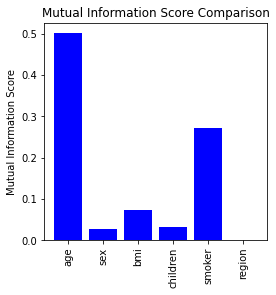

In [ ]:
%matplotlib inline
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=CH_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
feature_names = X.columns
selector = VarianceThreshold()
selector.fit_transform(X)

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        3.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        2.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        2.        ],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        2.        ],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        3.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        1.        ]])

In [ ]:
from sklearn.feature_selection import mutual_info_classif
feature_names = X.columns
MI_score = mutual_info_classif(X, y, random_state=0)
for feature in zip(feature_names, MI_score):
 print(feature)

('age', 0.5006249059869678)
('sex', 0.02731109467707382)
('bmi', 0.07349324000888036)
('children', 0.031944975096213746)
('smoker', 0.2714408670272772)
('region', 0.0)


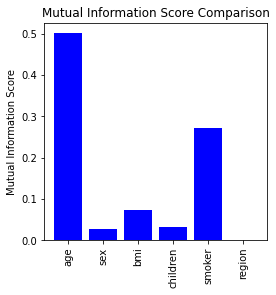

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

# .Validation of The Model KNN

**Grid search**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model1 =KNeighborsClassifier()
params = {'n_neighbors': range(2,11),'weights':['uniform','distance']
          ,'metric':['euclidean',
          'manhattan','minkowski']}
model = GridSearchCV(model1, params, cv=5 ,scoring='accuracy')
model.fit(X_train,y_train)
print(model.best_estimator_)
print(model.best_params_)
print(model.best_score_)
best_model=model.best_estimator_


KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
0.803396290818068


In [ ]:
#the best model prediction
y_pred=best_model.predict(X_test)

**because of our unbalanced data ,we tried different precision averages (micro,macro,weighted) to see what suits our model **

**micro averaging means that all samples contributes to the final averaging metric**

In [ ]:

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))

Accuracy Score : 0.8308457711442786
Precision Score : 0.8308457711442786
Recall Score : 0.8308457711442786
F1 Score : 0.8308457711442786


**weighted averaging means each classes contributes in teh average is weigted by it size**

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='weighted')))

Accuracy Score : 0.8308457711442786
Precision Score : 0.835021777632527
Recall Score : 0.8308457711442786
F1 Score : 0.8287678926892929


**macro averaging means that all classes contribues to the final metric**

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='macro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='macro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='macro')))

Accuracy Score : 0.8308457711442786
Precision Score : 0.8076615686323133
Recall Score : 0.8332518185231363
F1 Score : 0.8166297731045932


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[ 35   2   6   0]
 [  0  70  10   1]
 [ 13  17 100  13]
 [  0   5   1 129]]


# KNN by Grid search and Feature Selection 

In [ ]:
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import pandas as pd


In [ ]:
efs1 = EFS(best_model, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 56/56

Best accuracy score: 0.86
Best subset (indices): (0, 2, 3, 4)
Best subset (corresponding names): ('age', 'bmi', 'children', 'smoker')


# New Dataset

In [ ]:
X_new = efs1.transform(X)
# Print the results
print('Number of features before transformation: {}'.format(X.shape[1]))
print('Number of features after transformation: {}'.format(X_new.shape[1]))

Number of features before transformation: 6
Number of features after transformation: 4


In [ ]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
2,"(2,)","[0.2798507462686567, 0.23507462686567165, 0.27...",0.26383,"(bmi,)",0.023095,0.017969,0.008984
14,"(1, 5)","[0.2947761194029851, 0.26865671641791045, 0.25...",0.270549,"(sex, region)",0.020178,0.015699,0.007849
5,"(5,)","[0.22014925373134328, 0.3246268656716418, 0.32...",0.284745,"(region,)",0.056516,0.043971,0.021986
11,"(1, 2)","[0.30223880597014924, 0.2798507462686567, 0.31...",0.285472,"(sex, bmi)",0.025522,0.019857,0.009928
17,"(2, 5)","[0.2873134328358209, 0.26492537313432835, 0.28...",0.287014,"(bmi, region)",0.0346,0.02692,0.01346
33,"(1, 2, 5)","[0.2947761194029851, 0.2873134328358209, 0.313...",0.301202,"(sex, bmi, region)",0.020445,0.015907,0.007953
15,"(2, 3)","[0.291044776119403, 0.27238805970149255, 0.332...",0.301951,"(bmi, children)",0.033166,0.025804,0.012902
19,"(3, 5)","[0.3283582089552239, 0.3246268656716418, 0.287...",0.303416,"(children, region)",0.032299,0.02513,0.012565
31,"(1, 2, 3)","[0.29850746268656714, 0.3246268656716418, 0.29...",0.308673,"(sex, bmi, children)",0.038604,0.030036,0.015018
12,"(1, 3)","[0.2798507462686567, 0.3582089552238806, 0.343...",0.312374,"(sex, children)",0.041044,0.031934,0.015967


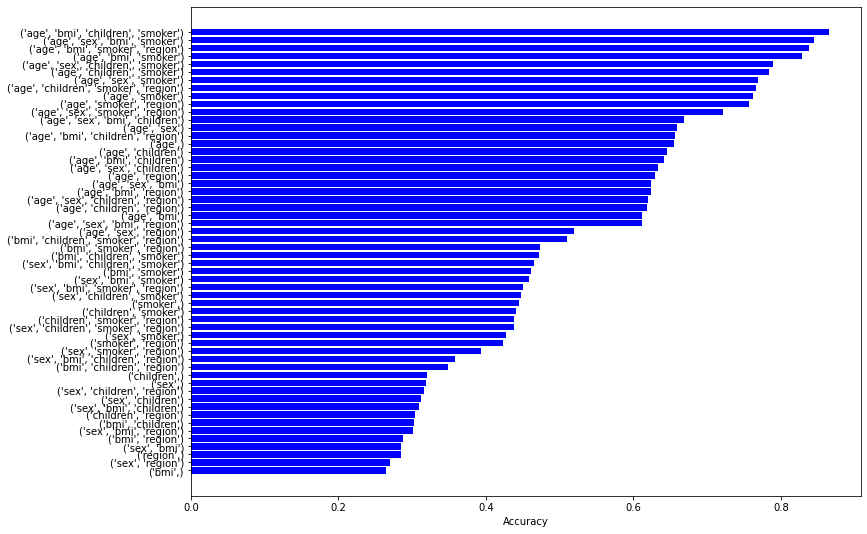

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,9))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos,
 efs_results['avg_score'],
 color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show(block=False)


## Validation du modèle KNN

**L’approche Holdout**

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)
acho=accuracy_score(y2,y2_model)
prho=precision_score(y2,y2_model,average='weighted')
reho=recall_score(y2,y2_model,average='weighted')
f1ho=f1_score(y2,y2_model,average='weighted')
listholdout=[acho,prho,reho,f1ho]
print('Accuracy Score : ',acho)
print('Precision Score : ',prho)
print('Recall Score : ',reho)
print('F1 Score : ' ,f1ho)

Accuracy Score :  0.7611940298507462
Precision Score :  0.762672177760402
Recall Score :  0.7611940298507462
F1 Score :  0.7596404628680583


**Cross-validation (Validation croisée)**

In [ ]:
#2-folds-cross-validation
X1, X2, y1, y2 = train_test_split(X,y, random_state= 0, train_size=0.5)
y2_model = model.fit(X1,y1).predict(X2)
y1_model = model.fit(X2,y2).predict(X1)
print('fold 1',accuracy_score(y1,y1_model))
print('fold 2',accuracy_score(y2, y2_model))


fold 1 0.7399103139013453
fold 2 0.7952167414050823


***folds cross-validation***

In [ ]:
#5-folds-cross-validation
from sklearn.model_selection import cross_val_score
accv5=cross_val_score(model, X, y, scoring="accuracy",cv=5).mean()
print('Accuracy Score : ',accv5)
prcv5=cross_val_score(model, X, y, scoring="precision_weighted",cv=5).mean()
print('Precision Score : ',prcv5)
recv5=cross_val_score(model, X, y, scoring="recall_weighted",cv=5).mean()
print('Recall Score : ',recv5)
f1cv5=cross_val_score(model, X, y, scoring="f1_weighted",cv=5).mean()
print('F1 Score : ' ,f1cv5)
list5fcv=[accv5,prcv5,recv5,f1cv5]
list5fcv

Accuracy Score :  0.7929397954049975
Precision Score :  0.7939188765552908
Recall Score :  0.7929397954049975
F1 Score :  0.7900085567871427


[0.7929397954049975,
 0.7939188765552908,
 0.7929397954049975,
 0.7900085567871427]

**Leave one out cross validation (LOOCV)**

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
score = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted']

kfold = model_selection.KFold(n_splits=5)
results = list(model_selection.cross_validate(model, X, y, scoring=score).values())
aclocv=np.mean(results[0])
prlocv=np.mean(results[1])
relocv=np.mean(results[2])
f1locv=np.mean(results[3])

print('Accuracy Score : ',aclocv)
print('Precision Score : ',prlocv)
print('Recall Score : ',relocv)
print('F1 Score : ' ,f1locv)

Accuracy Score :  0.0047876834869384766
Precision Score :  0.01889328956604004
Recall Score :  0.7929397954049975
F1 Score :  0.7939188765552908


In [ ]:
listlocv=[aclocv,prlocv,relocv,f1locv]

# Évaluation du modèle



In [ ]:
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)
cm1= confusion_matrix(y2, y2_model)
print("Confusion Matrix: \n", cm1)

print("\nAccuracy :", accuracy_score(y2, y2_model))
print("Precision: ",precision_score(y2, y2_model, average='weighted'))
print("Recall : ",recall_score(y2, y2_model, average='macro'))

print("\nConfusion matrix:\n", confusion_matrix(y2, y2_model))
print("\nClassification report : \n", classification_report(y2, y2_model))

Confusion Matrix: 
 [[ 30   1  18   0]
 [  0  74  12   2]
 [ 15  15  81  16]
 [  0  12   0 126]]

Accuracy : 0.7736318407960199
Precision:  0.7709837800926475
Recall :  0.7509981856799238

Confusion matrix:
 [[ 30   1  18   0]
 [  0  74  12   2]
 [ 15  15  81  16]
 [  0  12   0 126]]

Classification report : 
               precision    recall  f1-score   support

       eleve       0.67      0.61      0.64        49
      faible       0.73      0.84      0.78        88
       moyen       0.73      0.64      0.68       127
 tres faible       0.88      0.91      0.89       138

    accuracy                           0.77       402
   macro avg       0.75      0.75      0.75       402
weighted avg       0.77      0.77      0.77       402



In [ ]:
list1=['accuracy','precisiom','recall','f1']
df=pd.DataFrame(columns=['_','Holdout (70%-30%)','5-folds-cross-validation','LOOCV'])

In [ ]:
dict1 = {'_':list1,
        'Holdout (70%-30%)':listholdout,
        '5-folds-cross-validation':list5fcv,
         'LOOCV':listlocv
       }
df = pd.DataFrame(dict1)
df=df.set_index('_')

In [ ]:
df

,Holdout (70%-30%),5-folds-cross-validation,LOOCV
_,,,
accuracy,0.761194,0.792940,0.004788
precisiom,0.762672,0.793919,0.018893
recall,0.761194,0.792940,0.792940
f1,0.759640,0.790009,0.793919


**Grid Search**

In [ ]:
#Grid search
from sklearn.model_selection import GridSearchCV
#creat a new KNN model
Knn2 = KNeighborsClassifier()
grid_param={'n_neighbors': range(1,31),
 'weights' : ['uniform', 'distance'],
 'metric' : ['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.8303389069689148
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')


**trouver les paramètres optimaux en utilisant LOOCV.**

# Validation du modèle DT

## **Holdout**

In [ ]:
X.shape

(1338, 6)

In [ ]:
y

0             moyen
1       tres faible
2       tres faible
3             moyen
4       tres faible
           ...     
1333          moyen
1334    tres faible
1335    tres faible
1336    tres faible
1337          eleve
Name: charges, Length: 1338, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score,recall_score, classification_report
from sklearn.model_selection import train_test_split
DT = DecisionTreeClassifier()
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=DT.fit(X1,y1).predict(X2)

In [ ]:
model = DecisionTreeClassifier()
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)
acho=accuracy_score(y2,y2_model)
prho=precision_score(y2,y2_model,average='weighted')
reho=recall_score(y2,y2_model,average='weighted')
f1ho=f1_score(y2,y2_model,average='weighted')
listholdout=[acho,prho,reho,f1ho]
print('Accuracy Score : ',acho)
print('Precision Score : ',prho)
print('Recall Score : ',reho)
print('F1 Score : ' ,f1ho)

Accuracy Score :  0.8009950248756219
Precision Score :  0.8004589330102704
Recall Score :  0.8009950248756219
F1 Score :  0.8005894606333582


## Cross validation

In [ ]:
#5 fold
from sklearn.model_selection import cross_val_score
cross_val_score(DT, X, y, cv=5)

array([0.83208955, 0.81343284, 0.82089552, 0.82397004, 0.83520599])

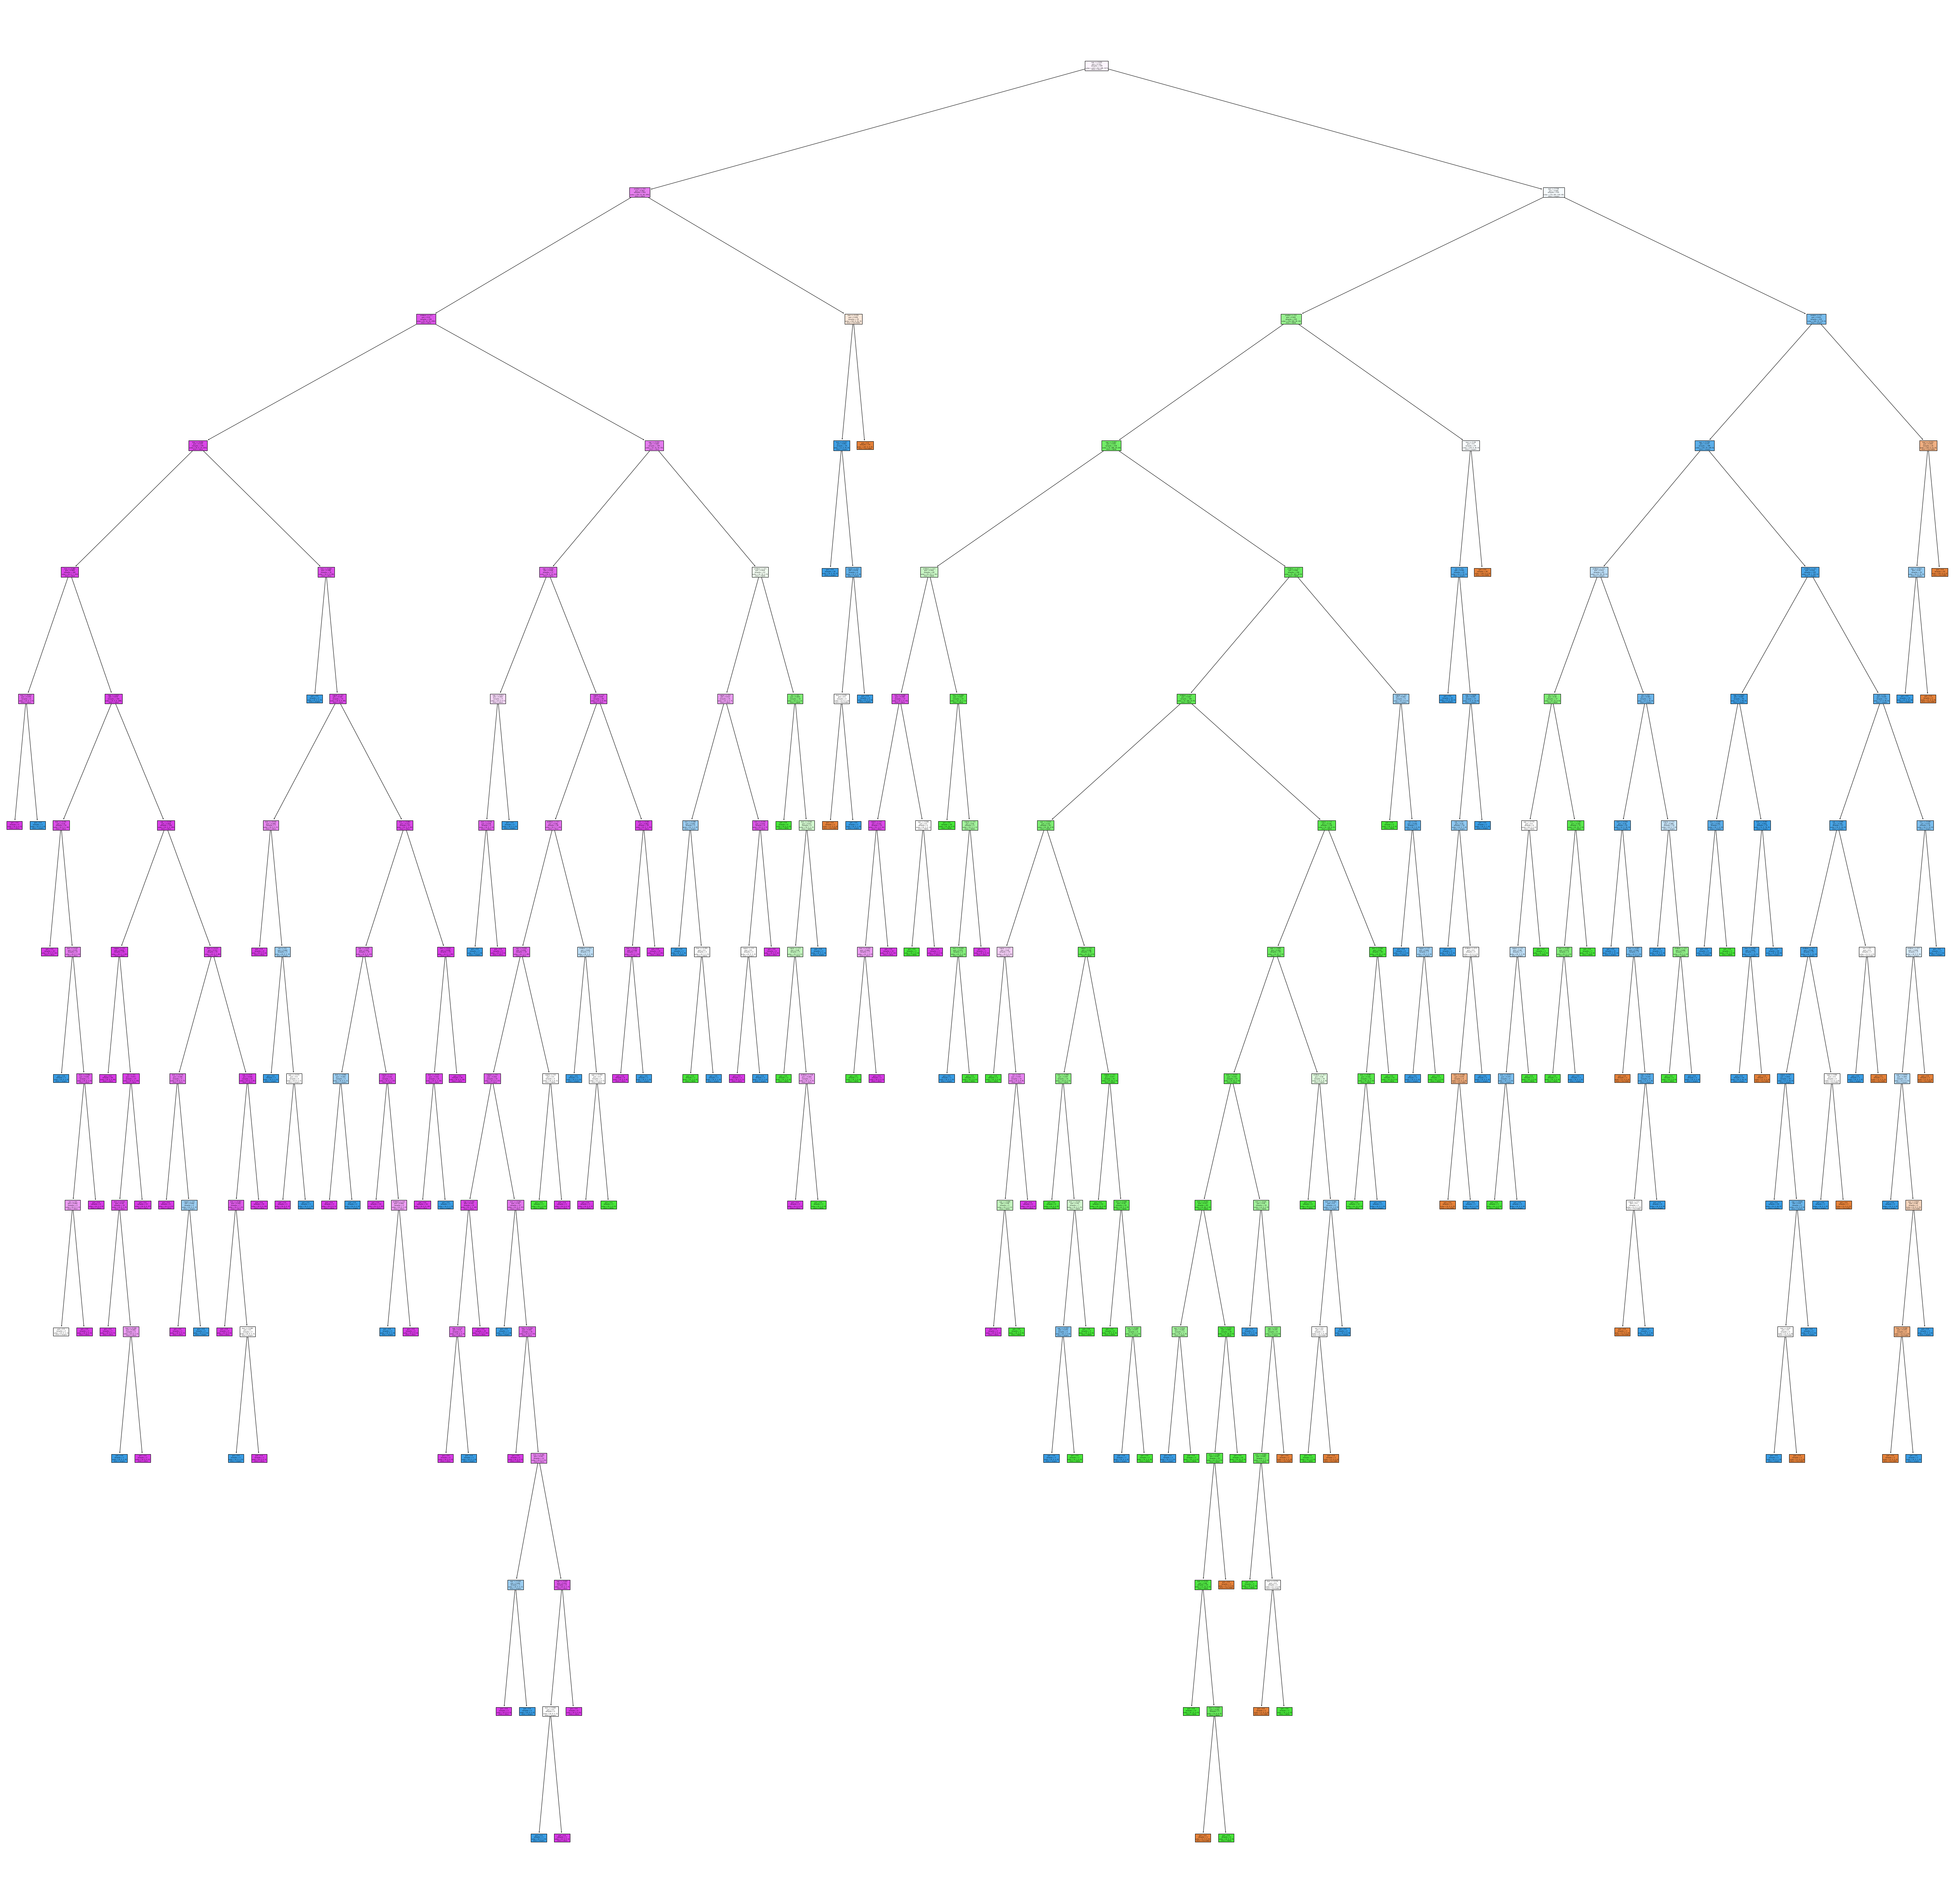

In [ ]:
from sklearn import tree
%matplotlib inline
fig = plt.figure(figsize=(90,90))
_ = tree.plot_tree(DT,
 feature_names=X.columns,
 class_names=['tres faible','faible','moyen','eleve'],
 filled=True)

## 5 fold cross validation

In [ ]:
#5-folds-cross-validation
from sklearn.model_selection import cross_val_score
accv5=cross_val_score(model, X, y, scoring="accuracy",cv=5).mean()
print('Accuracy Score : ',accv5)
prcv5=cross_val_score(model, X, y, scoring="precision_weighted",cv=5).mean()
print('Precision Score : ',prcv5)
recv5=cross_val_score(model, X, y, scoring="recall_weighted",cv=5).mean()
print('Recall Score : ',recv5)
f1cv5=cross_val_score(model, X, y, scoring="f1_weighted",cv=5).mean()
print('F1 Score : ' ,f1cv5)
list5fcv=[accv5,prcv5,recv5,f1cv5]

Accuracy Score :  0.8228688020571301
Precision Score :  0.8269708542996599
Recall Score :  0.8243669293979542
F1 Score :  0.8292649605334443


## LOOCV

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
score = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted']

kfold = model_selection.KFold(n_splits=5)
results = list(model_selection.cross_validate(model, X, y, scoring=score).values())
aclocv=np.mean(results[0])
prlocv=np.mean(results[1])
relocv=np.mean(results[2])
f1locv=np.mean(results[3])


print('Recall Score : ',relocv)
print('F1 Score : ' ,f1locv)
listlocv=[aclocv,prlocv,relocv,f1locv]

Recall Score :  0.818388395103136
F1 Score :  0.8245621412838083


## Table 3 validations

In [ ]:
list1=['accuracy','precisiom','recall','f1']
df=pd.DataFrame(columns=['_','Holdout (70%-30%)','5-folds-cross-validation','LOOCV'])

In [ ]:
dict1 = {'Score':list1,
        'Holdout (70%-30%)':listholdout,
        '5-folds-cross-validation':list5fcv,
         'LOOCV':listlocv
       }
df = pd.DataFrame(dict1)
df=df.set_index('Score')

In [ ]:
df

,Holdout (70%-30%),5-folds-cross-validation,LOOCV
Score,,,
accuracy,0.800995,0.822869,0.006200
precisiom,0.800459,0.826971,0.007783
recall,0.800995,0.824367,0.818388
f1,0.800589,0.829265,0.824562


In [ ]:
X1=data[['bmi','charges','age','children']]

In [ ]:
X2=data[['age','sex','bmi','smoker']]

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0.0,1,3
1,0.000000,1,0.479150,0.2,0,2
2,0.217391,1,0.458434,0.6,0,2
3,0.326087,1,0.181464,0.0,0,1
4,0.304348,1,0.347592,0.0,0,1
...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,1
1334,0.000000,0,0.429379,0.0,0,0
1335,0.000000,0,0.562012,0.0,0,2
1336,0.065217,0,0.264730,0.0,0,3


## DT Grid Search


In [ ]:
#Grid search 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creat a new KNN model 
DT2 = DecisionTreeClassifier()
params = {
 'max_depth': [2, 3, 5, 10, 20],
 'min_samples_leaf': [5, 10, 20, 50, 100],
 'criterion': ["gini", "entropy"]
}
grid = GridSearchCV(DT2, params, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8908652227583884
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)


In [ ]:
#!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
feature_names=["age","sex","bmi","children","smoker","region"], class_names= ['tres faible','faible','moyen','eleve'], 
 filled=True, rounded=True, 
 special_characters=True) 
graph = graphviz.Source(dot_data,format ='png') 
graph.render(filename='\content')

'\\content.png'

# Neuro Network

In [ ]:
from pandas import read_csv
url = 'https://raw.github.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(url,header=None)
print(df.shape) 

(63, 2)


In [ ]:
df.head(5)

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


**description statistique**

                0           1
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b8b076050>,
      dtype=object)

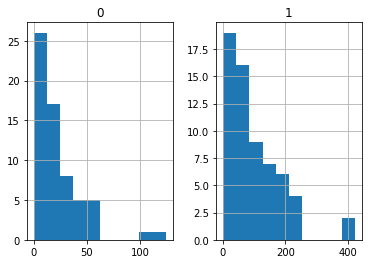

In [ ]:

#afficher une description statistique
print(df.describe())
#tracer les histogrammes
df.hist()
 

# Multilayer perceptron (MLP)




**Répartition Train/Test**

In [ ]:
from sklearn.model_selection import train_test_split
#colonnes d'entrée et de sortie
X, y =df.values[:,:-1], df.values[:,-1]
#train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33) 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#determiner le nombre de caractéristique d'entrée
n_features = X.shape[1]
#définire le model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
#compiler le model
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 0,
validation_data=(X_test, y_test)) 

In [ ]:
from sklearn.metrics import mean_absolute_error
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_absolute_error(y_test, yhat)
print('MAE : %.3f' %score) 

MAE : 47.506


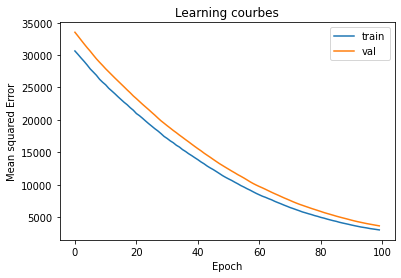

In [ ]:
import matplotlib.pyplot as plt
plt.title('Learning courbes')
plt.xlabel('Epoch')
plt.ylabel('Mean squared Error')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()
plt.show() 

In [ ]:
#préparer cross validation
from sklearn.model_selection import KFold , cross_val_score
import numpy as np
X,y = df.values[:,:-1], df.values[:,-1]
#kfold
kfold = KFold(10)
#énumérer les splits
scores = list()
for train_ix, test_ix, in kfold.split(X,y):
 X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
 #determiner le nombre d'input features
 n_features = X.shape[1]
 #define the model
 model = Sequential() 

In [ ]:
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
 #compile the model
model.compile(optimizer='adam', loss='mse')
 #fit the model
model.fit(X_train, y_train, epochs=100, batch_size = 8, verbose= 0)
 #prédir le test set
yhat= model.predict(X_test)
 #evaluer les predictions
score = mean_absolute_error(y_test,yhat)
print('>%.3f'%score)
scores.append(score)
#résumer les scores
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores))) 


>66.526
Mean MAE: 66.526 (0.000)


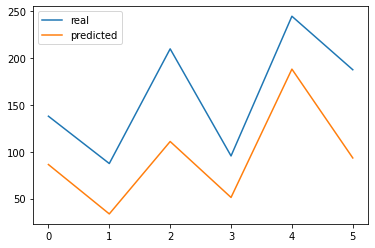

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(yhat, label = 'predicted')
plt.legend()
plt.show() 

In [ ]:
X_nouveau = [13]
yhat = model.predict(X_nouveau)
print('f(%s) = %.3f' % (X_nouveau, yhat[0])) 


f([13]) = 47.688


**MLP avec Grid Search**

In [ ]:
#pip install scikeras

In [ ]:
# Utiliser scikit-learn pour grid search
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor #KerasClassifier # Permet d'utiliserles modèles de Keras avec Scikit-Learn
from sklearn.preprocessing import LabelEncoder  
# Nombre d'attributs
n_features = X.shape[1]
def create_model(hidden_layer_dim=1, activation='relu'):
 # creer le model
  model=Sequential()
  model.add(Dense(hidden_layer_dim, input_dim=n_features, kernel_initializer='he_normal', activation=activation))
  model.add(Dense(1, activation= activation))
  return model
# load dataset

In [ ]:
# Diviser le dataset en entrée (X) et sortie (y)
X,y = df.values[:,:-1], df.values[:,-1]
# Creer le model
model = KerasRegressor(create_model, loss='mse', verbose=0, hidden_layer_dim = 10
, batch_size=8, activation= 'relu')
# definir les hyper-paramètres de grid search
param_grid = {
'hidden_layer_dim': [10, 30],
'epochs': [50, 100],
'activation': ['relu','elu']
}
grid = GridSearchCV(model, param_grid, n_jobs=-
1, cv=10, scoring = 'neg_mean_absolute_error')
grid.fit(X, y) 


GridSearchCV(cv=10,
             estimator=KerasRegressor(activation='relu', batch_size=8, hidden_layer_dim=10, loss='mse', model=<function create_model at 0x7f2b94927170>, verbose=0),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'elu'], 'epochs': [50, 100],
                         'hidden_layer_dim': [10, 30]},
             scoring='neg_mean_absolute_error')

In [ ]:
print("Best score: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, param in zip(means, params):
 print("%f with: %r" % (mean, param))
print(grid.best_estimator_) 

Best score: -32.216234 using {'activation': 'elu', 'epochs': 100, 'hidden_layer_dim': 30}
-67.336428 with: {'activation': 'relu', 'epochs': 50, 'hidden_layer_dim': 10}
-62.804062 with: {'activation': 'relu', 'epochs': 50, 'hidden_layer_dim': 30}
-69.125228 with: {'activation': 'relu', 'epochs': 100, 'hidden_layer_dim': 10}
-63.207663 with: {'activation': 'relu', 'epochs': 100, 'hidden_layer_dim': 30}
-50.787769 with: {'activation': 'elu', 'epochs': 50, 'hidden_layer_dim': 10}
-32.794622 with: {'activation': 'elu', 'epochs': 50, 'hidden_layer_dim': 30}
-40.022642 with: {'activation': 'elu', 'epochs': 100, 'hidden_layer_dim': 10}
-32.216234 with: {'activation': 'elu', 'epochs': 100, 'hidden_layer_dim': 30}
KerasRegressor(
	model=<function create_model at 0x7f2b94927170>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=mse
	metrics=None
	batch_size=8
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	e

# MLP with abalone dataset

In [ ]:
url1='https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv' 
df1 = read_csv(url1,header=None)
print(df.shape) 

(63, 2)


In [ ]:
df1.head(4)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [ ]:
df1.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df1[0].value_counts()

M    1528
I    1342
F    1307
Name: 0, dtype: int64

In [ ]:
df1.shape

(4177, 9)

**L'encodage de variable 0 :**

In [ ]:
le = LabelEncoder()
df1[0] = le.fit_transform(df1[0])


In [ ]:
y=df1[8]
X=df1.drop(columns=8)

In [ ]:
print(X.shape,y.shape)

(4177, 8) (4177,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33) 

In [ ]:
n_features = X.shape[1]
#define the model
model = Sequential()

# GridSearchCV avec 5-fold cross validation et chercher la meilleure
combinaison des hyper-paramètres suivant

In [ ]:

def create_model():
 # creer le model
  model=Sequential()
  model.add(Dense(10, input_dim=n_features, kernel_initializer='he_normal', activation='relu'))
  model.add(Dense(1, activation= 'relu'))
  return model
 
#history = model.fit(X_train, y_train, epochs = 100, batch_size = batch_size1, verbose = 0,
#validation_data=(X_test, y_test)) 

In [ ]:
params = {'batch_size' : [10, 40, 100],'optimizer' : ['adam','sgd']}
model = KerasRegressor(create_model, loss='mse', verbose=0, batch_size=8,optimizer='adam')
grid = GridSearchCV(model, params, n_jobs=-1, cv=5, scoring = 'neg_mean_absolute_error')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

-2.381035029111276
{'batch_size': 100, 'optimizer': 'sgd'}
KerasRegressor(
	model=<function create_model at 0x7f2b94927680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=mse
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)


In [ ]:
print("Best score: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, param in zip(means, params):
  print("%f with: %r" % (mean, param))
print(grid.best_estimator_) 

Best score: -2.381035 using {'batch_size': 100, 'optimizer': 'sgd'}
-6.802933 with: {'batch_size': 10, 'optimizer': 'adam'}
-6.808811 with: {'batch_size': 10, 'optimizer': 'sgd'}
-8.718055 with: {'batch_size': 40, 'optimizer': 'adam'}
-3.669358 with: {'batch_size': 40, 'optimizer': 'sgd'}
-8.789331 with: {'batch_size': 100, 'optimizer': 'adam'}
-2.381035 with: {'batch_size': 100, 'optimizer': 'sgd'}
KerasRegressor(
	model=<function create_model at 0x7f2b94927680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=mse
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)


# Using the whole dataset


In [ ]:
from sklearn.model_selection import train_test_split
#colonnes d'entrée et de sortie
X, y =df1.values[:,:-1], df1.values[:,-1]
#train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33) 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#determiner le nombre de caractéristique d'entrée
n_features = X.shape[1]
#définire le model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
#compiler le model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 0) 

In [ ]:
from sklearn.metrics import mean_absolute_error
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score1 = mean_absolute_error(y_test, yhat)
#score1 = root_mean_absolute_error(y_test, yhat)
print('MAE for the whole data : %.3f' %score1) 

MAE for the whole data : 1.563


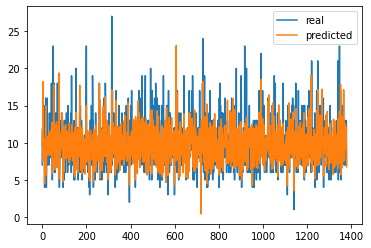

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(yhat, label = 'predicted')
plt.legend()
plt.show() 

# Information gain

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
#KerasClassifier # Permet d'utiliserles modèles de Keras avec Scikit-Learn
from sklearn.preprocessing import LabelEncoder  

In [ ]:
le = LabelEncoder()
df1[0] = le.fit_transform(df1[0])

In [ ]:
from sklearn.feature_selection import mutual_info_classif
feature_names=[7,2,4,3,1,6,5,0]
MI_score = mutual_info_classif(X, y, random_state=0)
for feature in zip(feature_names, MI_score):
 print(feature)

(7, 0.16098989744155423)
(2, 0.37313264891294207)
(4, 0.4094818414475476)
(3, 0.38411763976554925)
(1, 0.3874734666347357)
(6, 0.3327223458645703)
(5, 0.36988785248782197)
(0, 0.45386500751236936)


In [ ]:
feature_names=[0,1,2,3,4,5,6,7]
feature_names

[0, 1, 2, 3, 4, 5, 6, 7]

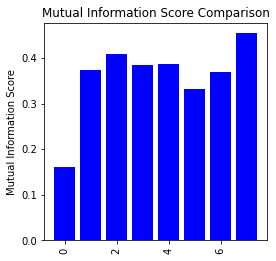

In [ ]:
%matplotlib inline
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

# 20% of the data :

In [ ]:
col=[7]
newX=df1[col]
X_train, X_test, y_train, y_test = train_test_split(newX,y, test_size=0.33) 
from keras.models import Sequential
from keras.layers import Dense
#determiner le nombre de caractéristique d'entrée
n_features = newX.shape[1]
#définire le model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
#compiler le model
model.compile(optimizer='sgd', loss='mse')
model.fit(X_train, y_train, epochs = 100, batch_size = 100, verbose = 0) 


In [ ]:
from sklearn.metrics import mean_absolute_error
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score2 = mean_absolute_error(y_test, yhat)

print('MAE for 20 % of data :',score2) 

MAE for 20 % of data : 1.832186598981784


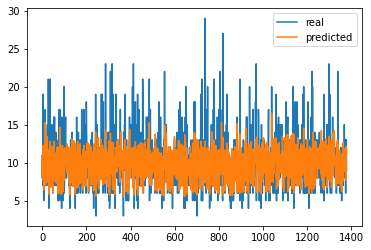

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(yhat, label = 'predicted')
plt.legend()
plt.show() 

# 30 % of the data :

In [ ]:
col=[7,2]
newX=df1[col]
X_train, X_test, y_train, y_test = train_test_split(newX,y, test_size=0.33) 
from keras.models import Sequential
from keras.layers import Dense
#determiner le nombre de caractéristique d'entrée
n_features = newX.shape[1]
#définire le model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
#compiler le model
model.compile(optimizer='sgd', loss='mse')
history = model.fit(X_train, y_train, epochs = 100, batch_size = 100, verbose = 0)

In [ ]:
yhat = model.predict(X_test)
#évaluer les predictions
score3 = mean_absolute_error(y_test, yhat)
#score1 = root_mean_absolute_error(y_test, yhat)
print('MAE for 30 % of data :', score3) 

MAE for 30 % of data : 1.7404348360964834


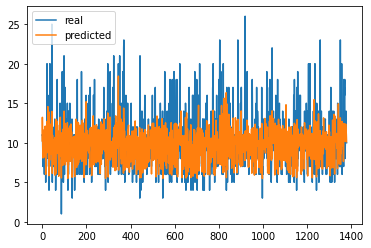

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(yhat, label = 'predicted')
plt.legend()
plt.show() 

# 40% of the data :

In [ ]:
col=[7,2,4]
newX=df1[col]
X_train, X_test, y_train, y_test = train_test_split(newX,y, test_size=0.33) 
from keras.models import Sequential
from keras.layers import Dense
#determiner le nombre de caractéristique d'entrée
n_features = newX.shape[1]
#définire le model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
#compiler le model
model.compile(optimizer='sgd', loss='mse')
history = model.fit(X_train, y_train, epochs = 100, batch_size = 100, verbose = 0)

In [ ]:
yhat = model.predict(X_test)
#évaluer les predictions
score4 = mean_absolute_error(y_test, yhat)
#score1 = root_mean_absolute_error(y_test, yhat)
print('MAE for 40 % of data : ',score4) 

MAE for 40 % of data :  1.6653129444163808


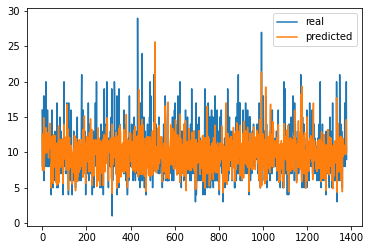

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(yhat, label = 'predicted')
plt.legend()
plt.show() 

# 50% of the data :

In [ ]:
col=[7,2,4,3]
newX=df1[col]
X_train, X_test, y_train, y_test = train_test_split(newX,y, test_size=0.33) 
from keras.models import Sequential
from keras.layers import Dense
#determiner le nombre de caractéristique d'entrée
n_features = newX.shape[1]
#définire le model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
#compiler le model
model.compile(optimizer='sgd', loss='mse')
history = model.fit(X_train, y_train, epochs = 100, batch_size = 100, verbose = 0)

In [ ]:
yhat = model.predict(X_test)
#évaluer les predictions
score5 = mean_absolute_error(y_test, yhat)
#score1 = root_mean_absolute_error(y_test, yhat)
print('MAE for 50 % of data : ',score5) 

MAE for 50 % of data :  1.7364869983927593


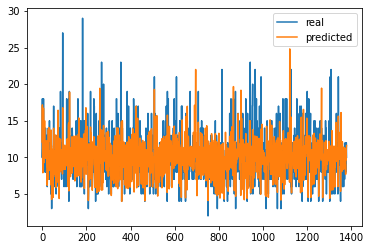

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(yhat, label = 'predicted')
plt.legend()
plt.show() 

# Results

In [ ]:
index1=['20%','30%','40%','50%']
va=[score2,score3,score4,score5]
res=pd.DataFrame(va,columns=['MAE'],index=index1)
res

,MAE
20%,1.832187
30%,1.740435
40%,1.665313
50%,1.736487
